In [2]:
import os
import pandas as pd
import numpy as np
import IPython.display as ipd
from glob import glob
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline 
import librosa
from librosa import display

In [3]:
## Matplotlib
plt.rc("figure", figsize=(16, 8))

In [4]:
cd C:\Users\cheny\Documents\Brand New - Degausser (Chezy)

C:\Users\cheny\Documents\Brand New - Degausser (Chezy)


In [5]:
notes = np.load('notes.npy')

In [6]:
len(notes)

33440

In [11]:
#1s = 1000ms
len(notes) / 1000 

33.44

In [10]:
notes[50:100]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
timestamp = 

sr = sampling rate (HZ)
frame = spectrogram col
n_fft = samples per frame
hop_length = #samples between frames

### Load Music

In [12]:
y, sr = librosa.load('song.ogg')

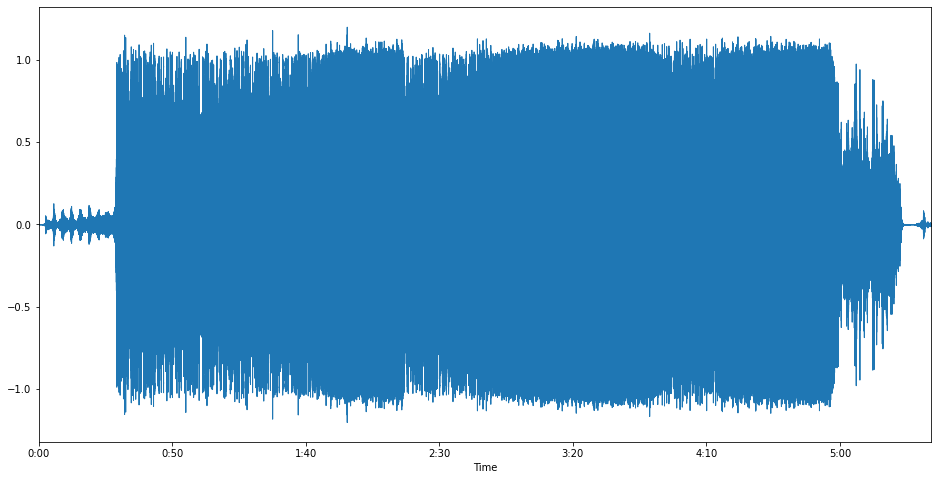

In [16]:
librosa.display.waveplot(y, sr);

In [ ]:
# Audio data information
print("Shape=", y.shape)
print("Sample rate fs=", sr)
print("Audio Length in seconds=%d [s]" % (y.shape[0]/sr))

### Sample

In [ ]:
#sample
x, fs = librosa.load('song.ogg', sr = None, mono = True, duration= 60)

In [ ]:
print(x.shape)
print(fs)

In [ ]:
ipd.Audio(x, rate = fs)

In [ ]:
y_harmonic, y_percussive = librosa.effects.hpss(x, margin=2.0)

In [ ]:
ipd.Audio(y_harmonic, rate = fs)

In [ ]:
type(y_harmonic)

In [ ]:
ipd.Audio(y_percussive, rate = fs)

In [ ]:
hop_len = 512
onset_frame_backtrack = librosa.onset.onset_detect(y_harmonic, sr = fs, hop_length = hop_len, backtrack=True)
print(onset_frame_backtrack)

In [ ]:
C = librosa.cqt(y_harmonic, sr = fs, fmin = librosa.note_to_hz('C1'), n_bins = 72, bins_per_octave = 12)
librosa.display.specshow(librosa.amplitude_to_db(C, ref = np.max), 
                         sr = fs, x_axis = 'time', y_axis = 'cqt_note')

### Onset time

In [ ]:
onset_frames = librosa.onset.onset_detect(y_harmonic, sr=fs, wait=1, pre_avg=1, post_avg=1, pre_max=1, post_max=1,hop_length = hop_len, backtrack=True)
print(onset_frames) # frame numbers of estimated onsets

In [ ]:
onset_times = librosa.frames_to_time(onset_frames)
print(onset_times)

In [ ]:
onset_samples = librosa.frames_to_samples(onset_frames)

In [ ]:
S = librosa.stft(y_harmonic)
logS = librosa.amplitude_to_db(abs(S))

In [ ]:
plt.plot(logS);

In [ ]:
librosa.display.specshow(logS, sr=fs, x_axis='time', y_axis='log')
plt.vlines(onset_times, 0, 10000, color='k')

In [ ]:
def concatenate_segments(x, onset_samples, pad_duration=0.500):
    """Concatenate segments into one signal."""
    silence = np.zeros(int(pad_duration*sr)) # silence
    frame_sz = min(np.diff(onset_samples))   # every segment has uniform frame size
    return np.concatenate([
        np.concatenate([x[i:i+frame_sz], silence]) # pad segment with silence
        for i in onset_samples
    ])

In [ ]:
concatenated_signal = concatenate_segments(y_harmonic, onset_samples, 0.500)

In [ ]:
ipd.Audio(concatenated_signal, rate=sr)

## Comparing with back tracking

In [ ]:
hop_len = 512
onset_frame_backtrack = librosa.onset.onset_detect(x, sr = fs, hop_length = hop_len, backtrack=True)
print(onset_frame_backtrack)

In [ ]:
onset_time_back_track = librosa.frames_to_time(onset_frame_backtrack, sr = fs, hop_length = hop_len)
print(onset_time_back_track)

In [ ]:
onset_samples_backtrack = librosa.frames_to_samples(onset_frame_backtrack, hop_length=hop_len)
print(onset_samples_backtrack)

In [ ]:
concatenated_signal_bt = concatenate_segments(x, onset_samples_backtrack, 0.500)

In [ ]:
ipd.Audio(concatenated_signal_bt, rate=sr)

In [ ]:
#S = librosa.stft(x)
#logS = librosa.logamplitude(S)
librosa.display.specshow(logS, sr=sr, x_axis='time', y_axis='log')
plt.vlines(onset_time_back_track, 0, 10000, color='k')

### output file for time - DONT RUN

In [ ]:
# https://musicinformationretrieval.com/onset_detection.html

def main():
    file_path = 'guitar.ogg'
    x, sr = librosa.load(file_path)
    onset_frames = librosa.onset.onset_detect(x, sr=sr, wait=1, pre_avg=1, post_avg=1, pre_max=1, post_max=1)
    onset_times = librosa.frames_to_time(onset_frames)
    # remove extension, .mp3, .wav etc.
    file_name_no_extension, _ = os.path.splitext(file_path)
    output_name = file_name_no_extension + '.beatmap.txt'
    with open(output_name, 'wt') as f:
        f.write('\n'.join(['%.4f' % onset_time for onset_time in onset_times]))

if __name__ == '__main__':
    main()

# Exploring Frquency Q transform option CQT

In [ ]:
# Parameters
## Signal Processing 
fs = 44100                               # Sampling Frequency
nfft = 2048                              # length of the FFT window: defines the number of bins used for dividing the window into equal strips, or bins. Hence, a bin is a spectrum sample , and defines the frequency resolution of the window. By default : N (Bins) = FFT Size/2
overlap = 0.5                            # Hop overlap percentage
hop_length = int(nfft * (1 - overlap))   # Number of samples between successive frames(CQT col)
n_bins = 72                              # Number of frequency bins starting at f_min
mag_exp = 4                              # Magnitude Exponent
pre_post_max = 6                         # Pre- and post- samples for peak picking
cqt_threshold = -120                     # Threshold for CQT dB levels, all values below threshold are set to -120 dB

In [ ]:
#constant q transform: transform time domain to frequency domain (music notes)
#n_bins per octave is 12 -> bins_oer_octave
#Defaults to C1 ~= 32.70 Hz

def calc_cqt(x,fs=fs,hop_length=hop_length, n_bins=n_bins, mag_exp=mag_exp):
    #using librosa cqt function for the q transform
    C = librosa.cqt(x, sr=fs, hop_length = hop_length, fmin = None, n_bins = n_bins)
    #getting the magnitude (S) ** Magnitude Exponent
    C_mag = librosa.magphase(C)[0] ** mag_exp
    # Convert an amplitude spectrogram to dB-scaled spectrogram.
    CdB = librosa.core.amplitude_to_db(C_mag ,ref=np.max)
    
    return CdB

In [ ]:
# CQT Threshold: below to a value -120 db, at a certain pitch or frequecy

def cqt_thresholded(cqt,thres = cqt_threshold):
    new_cqt=np.copy(cqt)
    new_cqt[new_cqt < thres] = -120
    
    return new_cqt

In [ ]:
# Onset Envelope from Cqt

def calc_onset_env(cqt):
    return librosa.onset.onset_strength(S=cqt, sr=fs, aggregate=np.mean, hop_length=hop_length)

In [ ]:
# Onset from Onset Envelope

def calc_onset(cqt, pre_post_max=pre_post_max, backtrack=True):
    onset_env=calc_onset_env(cqt)
    onset_frames = librosa.onset.onset_detect(onset_envelope=onset_env,
                                           sr=fs, units='frames', 
                                           hop_length=hop_length, 
                                           backtrack=backtrack,
                                           pre_max=pre_post_max,
                                           post_max=pre_post_max)
    
    onset_boundaries = np.concatenate([[0], onset_frames, [cqt.shape[1]]])
    onset_times = librosa.frames_to_time(onset_boundaries, sr=fs, hop_length=hop_length)
    return [onset_times, onset_boundaries, onset_env]

In [ ]:
from ipywidgets import IntSlider, FloatSlider, fixed, Checkbox
from ipywidgets import interactive_output
from ipywidgets import VBox, Label

In [ ]:
# Fine Tuning UI
style = {'description_width': 'initial'}
mag_exp_slider=IntSlider(value = mag_exp, min=1, max=32, step=1, 
                         description='mag_exp:',continuous_update=False)

thres_slider=IntSlider(value=cqt_threshold, min=-120, max=0, step=1, 
                                                     description='Threshold:',continuous_update=False)

pre_post_slider=IntSlider(value=pre_post_max, min=1, max=32, step=1, 
                         description='Pre_post_max:',continuous_update=False, style=style)

backtrack_box=Checkbox(value=False,description='backtrack',disabled=False)


def inter_cqt_tuning(mag_exp,thres,pre_post_max, backtrack):
    thres=thres_slider.value
    mag_exp=mag_exp_slider.value
    pre_post_max=pre_post_slider.value
    backtrack=backtrack_box.value
    global CdB
    CdB = calc_cqt(y_harmonic,fs,hop_length, n_bins, mag_exp)
    plt.figure()
    new_cqt=cqt_thresholded(CdB,thres)
    librosa.display.specshow(new_cqt, sr=fs, hop_length=hop_length, x_axis='time', y_axis='cqt_note', cmap='coolwarm')
    plt.ylim([librosa.note_to_hz('B2'),librosa.note_to_hz('B6')])
    global onsets
    onsets=calc_onset(new_cqt,pre_post_max, backtrack)
    plt.vlines(onsets[0], 0, fs/2, color='k', alpha=0.8)
    plt.title("CQT")
    plt.colorbar()
    plt.show()

In [ ]:
# Display UI
out = interactive_output(inter_cqt_tuning,  {'mag_exp': mag_exp_slider, 'thres': thres_slider, 
                                             'pre_post_max': pre_post_slider, 'backtrack':backtrack_box})
ui = VBox([mag_exp_slider, thres_slider, pre_post_slider, backtrack_box])

In [ ]:
ui

In [ ]:
out

In [ ]:
notes = np.load('notes.npy')
notes

In [ ]:
song= np.load('song.npy')
#3, 81, 33440

In [ ]:
song[0]

In [ ]:
len(notes)

In [ ]:
len(song[0])

# Demucs

In [ ]:
!pip install demucs

# Aubio

In [ ]:
pip install aubio

In [ ]:
import aubio
from aubio import source, onset

def get_onset_times(file_path):
    window_size = 1024 # FFT size
    hop_size = window_size // 4

    sample_rate = 0
    src_func = source(file_path, sample_rate, hop_size)
    sample_rate = src_func.samplerate
    onset_func = onset('default', window_size, hop_size)
    
    duration = float(src_func.duration) / src_func.samplerate

    onset_times = [] # seconds
    while True: # read frames
        samples, num_frames_read = src_func()
        if onset_func(samples):
            onset_time = onset_func.get_last_s()
            if onset_time < duration:
                onset_times.append(onset_time)
            else:
                break
        if num_frames_read < hop_size:
            break
    
    return onset_times